[0.5, 1.2, 1.9, 2.5999999999999996, 3.3, 4.0]
(40000,)
340
[0.5, 1.2, 1.9, 2.5999999999999996, 3.3, 4.0]
(40000,)
347
[0.5, 1.2, 1.9, 2.5999999999999996, 3.3, 4.0]
(40000,)
321
[0.5, 1.2, 1.9, 2.5999999999999996, 3.3, 4.0]
(40000,)
331
[0.5, 1.2, 1.9, 2.5999999999999996, 3.3, 4.0]
(40000,)
330


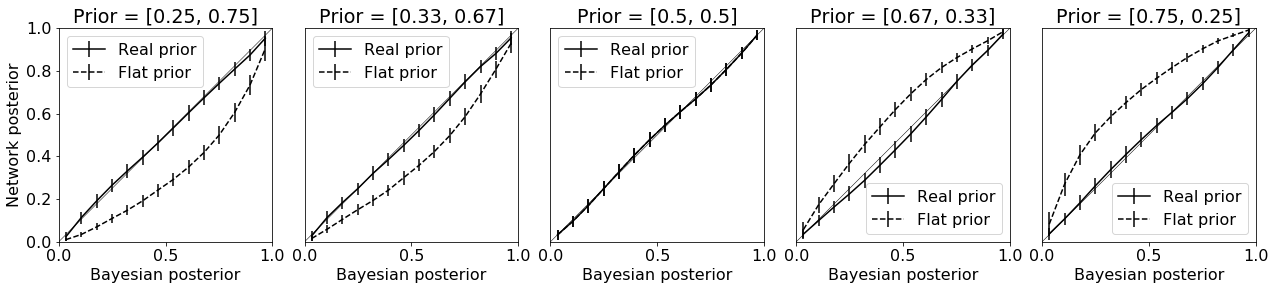

In [91]:
import sys
sys.path.append("/home/squax/GitHub/PNN/")
import torch
import numpy as np
import tqdm
import json

import matplotlib.pyplot as plt
import scipy.stats as sst

from tasks import *
from pytorch_networks import *
from tools import *
from pytorch_trainer import *
from matplotlib import rc
rc('text', usetex=False)

plt.rcParams.update({'font.size': 16})
# # model parameters
# N_input = 50
# N_hidden = 200

# # task parameters
# N_test = 20000
# N_class = 1
# N_cond = 2
# means=[-5, 5]
# sigmas=[9, 9]
# gain=np.array([0.37,0.90,1.81,2.82,3.57,4.00])*0.4 #*0.4
# prior=[0.75,0.25]

# model location
predictors = []
Qs = []
priors = []
tests = []

for task_id in xrange(1,6):
    task = 'class_'+str(task_id)
    param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param_NH50_new2_rev' + task + ''#2
    model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model_NH50_new2_rev' + task + ''#2    
#     param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param_GNH200_' + task + ''#2
#     model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model_GNH200_' + task + ''#2
#     if task_id ==2:
#         param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param10_' + task + '_2'#2
#         model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model10_' + task + '_2'#2
    with open(param_loc+'.json','r') as fp:
        params = json.load(fp)   
    locals().update(params)
    N_test = 20000

    priors.append(prior)
    # define task
    test_data = classification_task(mu=means,sig2=sigmas,n_samples=N_test, sig2N = sig_phi,g=gain, n_input=N_input, pCin=prior,test=True,original=False)

    # define iterator
    test_iter = FixedIterator(test_data, batch_size=N_test*len(gain)*N_class*N_cond)

    # define model
    model = Classifier(MLP2(N_input,N_hidden, 2, bias = False))

    # setup optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)


    # load model
    model.load_state_dict(torch.load(model_loc))
    model.eval()
    
    #model.predictor.l2.b.data[[0,1]]=model.predictor.l2.b.data[[1,0]]
#     model = Classifier(model)
    # setup tester
    test = tester(model)

    # run tester
    test.run(test_iter)
    
    predictors.append(model.predictor)
    tests.append(test)
    print(gain)
    # extract relevant data
    Q = extract_quantities(test,gain,N_test,2)
    print(np.sum(test.R,1)[np.squeeze(test.G==gain[0])].shape)
    print(len(test.R)/6-np.count_nonzero(np.sum(test.R,1)[np.squeeze(test.G==gain[0])]))

    Qs.append(Q)
    HP11=bin_plot(test.real_posterior[:],test.test_posterior[:,0])
    HP21=bin_plot(test.real_posterior2[:],test.test_posterior[:,0])

    plt.figure(1,figsize = (18,4))
    plt.subplot(1,5,task_id)
    plt.errorbar(HP11['bins'],HP11['post_mean'],HP11['post_std'],fmt='k',label ='Real prior')
    plt.errorbar(HP21['bins'],HP21['post_mean'],HP21['post_std'],fmt='k--', label = 'Flat prior')
    plt.plot([0,1],[0,1],'k',linewidth=0.5)
    ax=plt.gca()
    ax.set_aspect(1)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title('Prior = '+str(prior))
    plt.xlabel('Bayesian posterior')
    plt.xticks([0,0.5,1])
    plt.legend()
    if task_id == 1:
        plt.ylabel('Network posterior')
    else:
        plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/real_vs_flat_new.eps',format='eps')



In [23]:
import sys
sys.path.append("/home/squax/GitHub/PNN/")
import torch
import numpy as np
import tqdm
import json

import matplotlib.pyplot as plt
import scipy.stats as sst

from tasks import *
from pytorch_networks import *
from tools import *
from pytorch_trainer import *

plt.rcParams.update({'font.size': 16})
# # model parameters
# N_input = 50
# N_hidden = 200

# # task parameters
# N_test = 20000
# N_class = 1
# N_cond = 2
# means=[-5, 5]
# sigmas=[9, 9]
# gain=np.array([0.37,0.90,1.81,2.82,3.57,4.00])*0.4 #*0.4
# prior=[0.75,0.25]

# model location
predictors2 = []
# Qs = []
# priors = []
# tests = []

for task_id in xrange(1,6):
    task = 'class_'+str(task_id)
    param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param_NH200_new_' + task + ''#2
    model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model_NH200_new_' + task + ''#2
    
#     param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param_GNH200_' + task + ''#2
#     model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model_GNH200_' + task + ''#2
#     if task_id ==2:
#         param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param10_' + task + '_2'#2
#         model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model10_' + task + '_2'#2
    with open(param_loc+'.json','r') as fp:
        params = json.load(fp)   
    locals().update(params)
    N_test = 20000

    priors.append(prior)
    # define task
    test_data = classification_task(mu=means,sig2=sigmas,n_samples=N_test, sig2N = sig_phi,g=gain, n_input=N_input, pCin=prior,test=True,original=False)

    # define iterator
    test_iter = FixedIterator(test_data, batch_size=1)

    # define model
    model = Classifier(MLP2(N_input,N_hidden, 2, bias = False))

    # setup optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)


    # load model
    model.load_state_dict(torch.load(model_loc))
    model.eval()
    
    #model.predictor.l2.b.data[[0,1]]=model.predictor.l2.b.data[[1,0]]
#     model = Classifier(model)
    # setup tester
    test = bp_tester(model,optimizer)

    # run tester
    test.run(test_iter)
    
    predictors2.append(test.predictors)
#     tests.append(test)


In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,3))
plt.rcParams.update({'font.size': 12})

from matplotlib import cm as cm1
from matplotlib import rcParams, cycler

plt.set_cmap(cm1.viridis)
rcParams['axes.prop_cycle'] = cycler(color='#1f77b4')

dist=11
ver,hor = 30,135
LR = np.zeros((12,5))

for ii in xrange(5):
    A = np.array(predictors2[ii][:])
    for iii in xrange(12):
        ind1 = iii*20000
        ind2 = (iii+1)*20000
        LR[iii,ii] = np.mean(A[ind1:ind2])
print(LR)
# print(np.std(np.abs(predictors[0][0]))/np.sqrt(200),np.std(np.abs(predictors[0][1]))/np.sqrt(200))

# print(np.mean(np.abs(predictors[4][0])),np.mean(np.abs(predictors[4][1])))
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(224,projection='3d')

#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = np.array([0.25,0.33,0.5,0.67,0.75])
print(LR[:6,:].T.shape)
Y = gain
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X,Y,LR[:6,:])
ax.set_xlabel('p(C)')
ax.set_ylabel('Contrast')
ax.set_zlabel(r'$\Delta W$')
ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10
ax.set_zlim3d([0.001,0.004])
ax.set_yticks([0.0,1.0,2.0,3.0,4.0])

ax.w_zaxis.set_major_formatter(formatter)
ax.view_init(ver, hor)
ax.dist = dist

mean1 = np.zeros((5,6))
ax = fig.add_subplot(222,projection='3d')
for task_id in xrange(0,5):
    mean1[task_id,:]=np.nanmean(Qs[task_id]['sp_all'][:,:N_test],axis=1)
#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = np.array([0.25,0.33,0.5,0.67,0.75])
Y = gain
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(mean1.shape)
ax.plot_surface(X,Y,mean1.T)
ax.set_xlabel('p(C)')
ax.set_ylabel('Contrast')
ax.set_zlabel('p(h>0)')
ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10
ax.tick_params(axis='z',pad=8)
ax.set_yticks([0.0,1.0,2.0,3.0,4.0])

ax.view_init(ver, hor)
ax.dist = dist

# plt.tight_layout()
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/sparse_prior_vs_gain.eps',format='eps')


mean1 = np.zeros((5,6))

ax = fig.add_subplot(223,projection='3d')
for task_id in xrange(0,5):
    mean1[task_id,:]=np.nanmean(Qs[task_id]['H_mean_all'][:,:N_test],axis=1)
#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = np.array([0.25,0.33,0.5,0.67,0.75])
Y = gain
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(mean1.shape)
ax.plot_surface(X,Y,mean1.T)
ax.set_xlabel('p(C)')
ax.set_ylabel('Contrast')
ax.set_zlabel(r'$\langle r \rangle$')
ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10
ax.tick_params(axis='z',pad=8)
ax.set_yticks([0.0,1.0,2.0,3.0,4.0])

ax.view_init(ver, hor)
ax.dist = dist

# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/sparse_r_prior_vs_gain.eps',format='eps')


mean2 = np.zeros((6,10))

ax = fig.add_subplot(221,projection='3d')

for ii in xrange(len(gain)):
    H = bin_plot(Qs[2]['Pg'][ii], Qs[2]['sp_all'][ii], sem=True, n_bins=11)
    mean2[ii,:]=H['post_mean']
#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = np.arange(0, 1,0.1)
Y = gain
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(mean2.shape)
ax.plot_surface(X,Y,mean2)
ax.set_xlabel('p(C|r)')
ax.set_ylabel('Contrast')
ax.set_zlabel('p(h>0)')
ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10
ax.set_yticks([0.0,1.0,2.0,3.0,4.0])
ax.view_init(ver, hor)
ax.dist = dist
plt.tight_layout()

# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/activation_effects.eps',format='eps')


[[0.00286327 0.0022023  0.00149597 0.00105663 0.00092597]
 [0.00283896 0.00222239 0.00154409 0.00104076 0.0009262 ]
 [0.00285619 0.00216782 0.00148918 0.00105281 0.00093776]
 [0.00281192 0.00220327 0.00150341 0.0010511  0.00092169]
 [0.00283451 0.00224078 0.0015476  0.00105665 0.00094506]
 [0.00284884 0.00218998 0.00153156 0.00107508 0.00093071]
 [0.00095469 0.00114569 0.00169129 0.0022971  0.00279056]
 [0.00094773 0.00114267 0.00161605 0.00231477 0.00275913]
 [0.00094064 0.00113169 0.00165582 0.00232534 0.00280427]
 [0.0009434  0.00112396 0.00164812 0.00234726 0.0027503 ]
 [0.00094739 0.00113193 0.00166292 0.00228167 0.00279139]
 [0.00092776 0.00113127 0.00169502 0.00230765 0.00281427]]
(5, 6)
(5, 6)
(5, 6)
(6, 10)
Error in callback <function post_execute at 0x2b8eb447ed70> (for post_execute):


RuntimeError: latex was not able to process the following string:
'$\\\\times\\\\mathdefault{10^{-3}}\\\\mathdefault{}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode
(/home/squax/.cache/matplotlib/tex.cache/cde6c4333e1897d680b11c0514e19393.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./cde6c4333e1897d680b11c0514e19393.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.13 ...}{15.000000}{\sffamily $\times\mathdefault
                                                  {10^{-3}}\mathdefault{}$}
No pages of output.
Transcript written on cde6c4333e1897d680b11c0514e19393.log.




<Figure size 432x288 with 0 Axes>

RuntimeError: latex was not able to process the following string:
'$\\\\times\\\\mathdefault{10^{-3}}\\\\mathdefault{}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode
(/home/squax/.cache/matplotlib/tex.cache/cde6c4333e1897d680b11c0514e19393.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./cde6c4333e1897d680b11c0514e19393.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.13 ...}{15.000000}{\sffamily $\times\mathdefault
                                                  {10^{-3}}\mathdefault{}$}
No pages of output.
Transcript written on cde6c4333e1897d680b11c0514e19393.log.




<Figure size 720x720 with 4 Axes>

[[0.00280158 0.00222879 0.0015299  0.00107225 0.00102841]
 [0.00287045 0.00222912 0.00155408 0.00107258 0.00099377]
 [0.00281879 0.00225714 0.00153558 0.00106655 0.00100346]
 [0.00286313 0.00223551 0.00154315 0.00106594 0.00100336]
 [0.00285636 0.00224636 0.00155004 0.00105506 0.00097907]
 [0.00281677 0.00215254 0.00151597 0.00105126 0.00099291]
 [0.00094554 0.00114273 0.0016589  0.002352   0.00287307]
 [0.00094937 0.00111105 0.00164265 0.00226503 0.00288073]
 [0.00094875 0.00112378 0.00167729 0.00228254 0.00289114]
 [0.00094798 0.00113857 0.00166413 0.00231497 0.00289341]
 [0.00094471 0.00112247 0.00164417 0.00232468 0.00290789]
 [0.00094728 0.00113776 0.00165298 0.0023084  0.00288059]]
(5, 6)
5
5
5
5
5
(5, 6)
(6, 10)


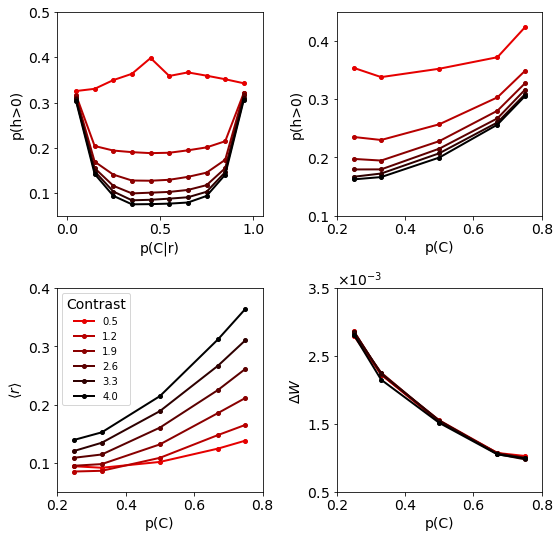

In [39]:
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,3))

from matplotlib import rc
# activate latex text rendering
rc('text', usetex=False)
plt.rcParams.update({'font.size': 14})

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rcParams, cycler

cm = LinearSegmentedColormap.from_list(
        'my_list', [(0.9,0,0),(0,0,0)], N=6)
cmap = cm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0,1,6)))

dist=11
ver,hor = 30,135
LR = np.zeros((12,5))

for ii in xrange(5):
    A = np.array(predictors2[ii][:])
    for iii in xrange(12):
        ind1 = iii*20000
        ind2 = (iii+1)*20000
        LR[iii,ii] = np.mean(A[ind1:ind2])
print(LR)
# print(np.std(np.abs(predictors[0][0]))/np.sqrt(200),np.std(np.abs(predictors[0][1]))/np.sqrt(200))

# print(np.mean(np.abs(predictors[4][0])),np.mean(np.abs(predictors[4][1])))
fig = plt.figure(figsize=(8,7.7))
ax = fig.add_subplot(224)

#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = np.array([0.25,0.33,0.5,0.67,0.75])
print(LR[:6,:].T.shape)
Y = gain

# for ii in xrange(6):
img1 = ax.plot(X,LR[:6,:].T,'.-',linewidth=2,markersize=8)
ax.set_xlabel('p(C)')
ax.set_ylabel(r'$\Delta W$')
plt.xlim([0.2,0.8])
plt.ylim([0.0005,0.0035])
plt.yticks([0.0005,0.0015,0.0025,0.0035])

ax.yaxis.set_major_formatter(formatter)

# fig.colorbar(img1,ax=ax)


mean1 = np.zeros((5,6))
ax = fig.add_subplot(222)
for task_id in xrange(0,5):
    print(len(Qs))
    mean1[task_id,:]=np.nanmean(Qs[task_id]['sp_all'][:,:N_test],axis=1)
#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = np.array([0.25,0.33,0.5,0.67,0.75])
Y = gain

img2 = ax.plot(X,mean1,'.-',linewidth=2,markersize=8)
ax.set_xlabel('p(C)')
ax.set_ylabel('p(h>0)')
plt.xlim([0.2,0.8])
plt.ylim([0.1,0.45])
plt.yticks([0.1,0.2,0.3,0.4])

# fig.colorbar(img2,ax=ax)


# plt.tight_layout()
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/sparse_prior_vs_gain.eps',format='eps')


mean1 = np.zeros((5,6))

ax = fig.add_subplot(223)
for task_id in xrange(0,5):
    mean1[task_id,:]=np.nanmean(Qs[task_id]['H_mean_all'][:,:N_test],axis=1)
#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = np.array([0.25,0.33,0.5,0.67,0.75])
Y = gain

print(mean1.shape)
img3 = ax.plot(X,mean1,'.-',linewidth=2,markersize=8)
ax.set_xlabel('p(C)')
ax.set_ylabel(r'$\langle r \rangle$')
plt.xlim([0.2,0.8])
plt.ylim([0.05,0.4])
plt.yticks([0.1,0.2,0.3,0.4])

# fig.colorbar(img3,ax=ax)
leg = plt.legend([gain[0],gain[1],gain[2],gain[3],gain[4],gain[5]],prop={'size':10})
leg.set_title('Contrast')
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/sparse_r_prior_vs_gain.eps',format='eps')


mean2 = np.zeros((6,10))

ax = fig.add_subplot(221)

for ii in xrange(len(gain)):
    H = bin_plot(Qs[2]['Pg'][ii], Qs[2]['sp_all'][ii], sem=True, n_bins=11)
    mean2[ii,:]=H['post_mean']
#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = gain
Y = np.arange(0.05, 1,0.1)

print(mean2.shape)
img4 = ax.plot(Y,mean2.T,'.-',linewidth=2,markersize=8)
ax.set_xlabel('p(C|r)')
ax.set_ylabel('p(h>0)')
plt.xlim([-0.05,1.05])
plt.ylim([0.05,0.5])

# fig.colorbar(img4,ax=ax)

plt.tight_layout()

# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/activation_effects_new.eps',format='eps')


(array([3., 7., 6., 2., 4., 4., 7., 6., 8., 6., 5., 5., 3., 3., 4., 5., 6.,
        0., 7.]),
 array([    0.        ,  1052.63157895,  2105.26315789,  3157.89473684,
         4210.52631579,  5263.15789474,  6315.78947368,  7368.42105263,
         8421.05263158,  9473.68421053, 10526.31578947, 11578.94736842,
        12631.57894737, 13684.21052632, 14736.84210526, 15789.47368421,
        16842.10526316, 17894.73684211, 18947.36842105, 20000.        ]),
 <a list of 19 Patch objects>)

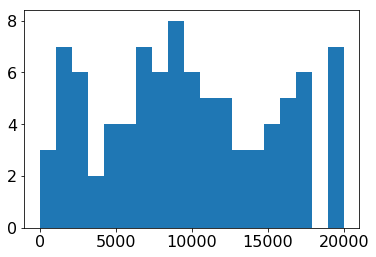

In [15]:
plt.figure()
bins = np.linspace(0,20000,20)
plt.hist(np.sum(tests[0].H,0),bins=bins)


0
[[1. 1.]
 [1. 1.]]
1.0
[[1. 1.]
 [1. 1.]]
1.0
[[1. 1.]
 [1. 1.]]
1.0
[[1. 1.]
 [1. 1.]]
1.0
[[1. 1.]
 [1. 1.]]
1.0


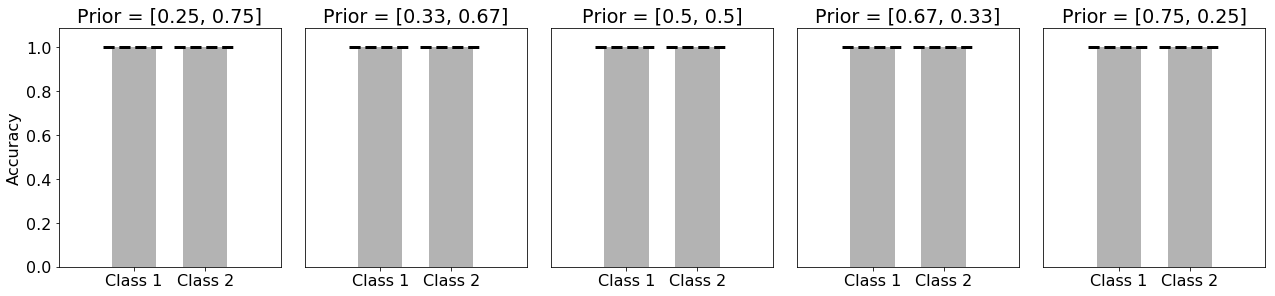

In [72]:
plt.rcParams.update({'font.size': 16})
print(tests[0].C[0])
plt.figure(2, figsize = (18,4.4))
for ii in xrange(5):
    correct = np.argmax(tests[ii].test_posterior,1)==tests[ii].C
    correct2 = (1-np.rint(tests[ii].real_posterior))==tests[ii].C

    acc1 = np.mean(correct[:len(tests[ii].C)/2])
    acc2 = np.mean(correct[len(tests[ii].C)/2:])
    acc21 = np.mean(correct2[:len(tests[ii].C)/2])
    acc22 = np.mean(correct2[len(tests[ii].C)/2:])
    
    print(np.corrcoef(tests[ii].test_posterior[:,0],tests[ii].real_posterior))
    print(np.mean(correct2[:]))

    plt.subplot(1,5,ii+1)
    plt.bar([0.7,2.3],[acc1,acc2], width = 1.0, color = [0.7,0.7,0.7])
    plt.plot([0.0,1.4],[acc21,acc21],'--k',linewidth = 3)
    plt.plot([1.6,3.0],[acc22,acc22],'--k',linewidth = 3)

    plt.xlim([-1,4])
    plt.ylim([0,1.09])

#     plt.xlabel('Class')
    plt.xticks([0.7,2.3],['Class 1','Class 2'])
    if ii == 0:
        plt.ylabel('Accuracy')
    else:
        plt.yticks([])
    plt.title('Prior = '+str(priors[ii]))
    plt.tight_layout()
#     plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/Error_vs_prior_new_rev.eps',format='eps')
    


Ttest_indResult(statistic=-2.3806622573674137, pvalue=0.02129884565464161)
Ttest_indResult(statistic=-1.7781512117259903, pvalue=0.08171360806199598)
Ttest_indResult(statistic=1.2348692561941976, pvalue=0.2228900088423197)
Ttest_indResult(statistic=1.7751695711251991, pvalue=0.08221073744509506)
Ttest_indResult(statistic=2.2458300533614386, pvalue=0.029354662184410147)


<Figure size 432x288 with 0 Axes>

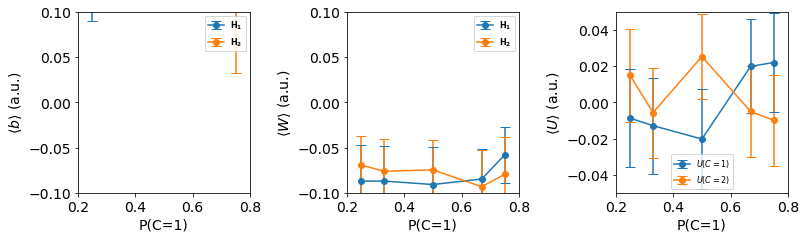

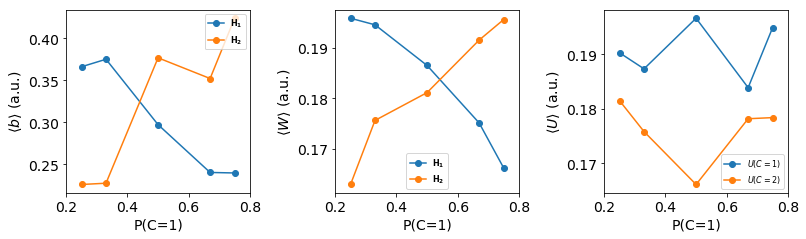

In [92]:
import scipy.stats as sst

from matplotlib import rc
from matplotlib import cm as cm1
from matplotlib import rcParams, cycler

plt.set_cmap(cm1.viridis)
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']


rcParams['axes.prop_cycle'] = cycler(color=new_colors)
# activate latex text rendering
rc('text', usetex=False)

plt.rcParams.update({'font.size': 14})

b2 = np.zeros((5,N_hidden))
s2 = np.zeros((5,N_hidden))

W_out_all = np.zeros((5,2))
b_hid_all = np.zeros((5,2))
W_hid_all = np.zeros((5,2))
W_out_std = np.zeros((5,2))
b_hid_std = np.zeros((5,2))
W_hid_std = np.zeros((5,2))
s_hid_all = np.zeros((5,2))
s_hid_std = np.zeros((5,2))

W_hid_std2 = np.zeros((5,2))
W_out_std2 = np.zeros((5,2))
b_hid_std2 = np.zeros((5,2))

N_all = np.zeros((5,2))


x = np.array([0.25,0.33,0.5,0.67,0.75])
for task_id in xrange(0,5):

    W = predictors[task_id].l1.weight.data.numpy()
    W2 = predictors[task_id].l2.weight.data.numpy()
    b = predictors[task_id].l1.bias.data.numpy()
    b2[task_id,:] = predictors[task_id].l1.bias.data.numpy()
#     b = np.zeros(204)
#     b2 = np.zeros(204)


    #s = predictors[task_id].p1.data.numpy()
#     s2[task_id,:] = predictors[task_id].p1.data.numpy()
    #b2 = model.predictor.l2.b.data

    idx = np.where(W2[0,:]>W2[1,:])
    idx2 = np.where(W2[0,:]<W2[1,:])
    N_all[task_id,0] = len(idx[0][:])
    N_all[task_id,1] = len(idx2[0][:])

    W_hid_all[task_id,0] = np.mean(W[idx,:].flatten())
    W_hid_all[task_id,1] = np.mean(W[idx2,:].flatten())
    W_out_all[task_id,0] = np.mean(W2[0,:].flatten())
    W_out_all[task_id,1] = np.mean(W2[1,:].flatten())
    b_hid_all[task_id,0] = np.mean(b[idx].flatten())
    b_hid_all[task_id,1] = np.mean(b[idx2].flatten())
#     s_hid_all[task_id,0] = np.mean(s[idx].flatten())
#     s_hid_all[task_id,1] = np.mean(s[idx2].flatten())
    
    W_hid_std[task_id,0] = np.std(W[idx,:].flatten())/np.sqrt(len(idx[0]))
    W_hid_std[task_id,1] = np.std(W[idx2,:].flatten())/np.sqrt(len(idx2[0]))
    W_out_std[task_id,0] = np.std(W2[0,:].flatten())/np.sqrt(W2.shape[1])
    W_out_std[task_id,1] = np.std(W2[1,:].flatten())/np.sqrt(W2.shape[1])
    b_hid_std[task_id,0] = np.std(b[idx].flatten())/np.sqrt(len(idx[0]))
    b_hid_std[task_id,1] = np.std(b[idx2].flatten())/np.sqrt(len(idx2[0]))

    W_hid_std2[task_id,0] = np.std(W[idx,:].flatten())
    W_hid_std2[task_id,1] = np.std(W[idx2,:].flatten())
    W_out_std2[task_id,0] = np.std(W2[0,:].flatten())
    W_out_std2[task_id,1] = np.std(W2[1,:].flatten())
    b_hid_std2[task_id,0] = np.std(b[idx].flatten())
    b_hid_std2[task_id,1] = np.std(b[idx2].flatten())
#     s_hid_std[task_id,0] = np.std(s[idx].flatten())/np.sqrt(len(idx[0]))
#     s_hid_std[task_id,1] = np.std(s[idx2].flatten())/np.sqrt(len(idx2[0]))
    print(sst.ttest_ind(b[idx].flatten(),b[idx2].flatten()))
    #print(sst.ttest_ind(W2[0].flatten(),W2[1].flatten()))
    #print(sst.ttest_ind(W[idx].flatten(),W[idx2].flatten()))
# plt.figure(figsize = (11,3.5))
# plt.subplot(1,3,1)
# # plt.boxplot(b2.T)
# plt.hist(s2[2,:].T)
# plt.hist(s2[2,idx].T)
# plt.hist(s2[2,idx2].T)

# plt.subplot(1,3,2)
# # plt.boxplot(b2.T)
# plt.hist(s2[0,:].T)

# plt.subplot(1,3,3)
# # plt.boxplot(b2.T)
# plt.hist(s2[4,:].T)

plt.figure(figsize = (15,3.55))
plt.subplot(1,4,1)
plt.errorbar(x,b_hid_all[:,0],b_hid_std[:,0],capsize=5,marker='o')
plt.errorbar(x,b_hid_all[:,1],b_hid_std[:,1],capsize=5,marker='o')

plt.xlim(0.2,0.8)
plt.ylim(-0.1,0.1)

#plt.ylim(0.0,0.22)
plt.xlabel('P(C=1)')
# plt.yticks([])
plt.ylabel(r'$\langle b \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.legend([r'$\bf{H}_1$',r'$\bf{H}_2$'],prop={'size': 8},loc='upper right')

plt.subplot(1,4,3)
plt.errorbar(x,W_out_all[:,0],W_out_std[:,0],capsize=5,marker='o')
plt.errorbar(x,W_out_all[:,1],W_out_std[:,1],capsize=5,marker='o')

plt.xlim(0.2,0.8)
plt.ylim(-0.05,0.05)
#plt.ylim(-0.05,0.05)
# plt.yticks([])

plt.xlabel('P(C=1)')
plt.ylabel(r'$\langle U \rangle$ (a.u.)')
plt.legend([r'$U(C=1)$',r'$U(C=2)$'],prop={'size': 8})

# plt.subplot(1,3,2)
# plt.errorbar(x,W_hid_all[:,0],W_hid_std[:,0],marker='o')
# plt.errorbar(x,W_hid_all[:,1],W_hid_std[:,1],marker='o')

# plt.xlim(0.2,0.8)
# # plt.yticks([])

# plt.xlabel('P(C=1)')
# plt.ylabel(r'$\langle W_{hidden} \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
# plt.tight_layout()

plt.subplot(1,4,2)
plt.errorbar(x,W_hid_all[:,0],W_hid_std[:,0],capsize=5,marker='o')
plt.errorbar(x,W_hid_all[:,1],W_hid_std[:,1],capsize=5,marker='o')

plt.xlim(0.2,0.8)
plt.ylim(-0.1,0.1)
#plt.ylim(-0.15,0.05)
# plt.yticks([])

plt.xlabel('P(C=1)')
plt.ylabel(r'$\langle W \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.legend([r'$\bf{H}_1$',r'$\bf{H}_2$'],prop={'size': 8})

# plt.subplot(1,4,4)
# plt.plot(x,N_all[:,0],marker='o')
# plt.plot(x,N_all[:,1],marker='o')

# plt.xlim(0.2,0.8)
# # plt.ylim(1,1.07)
# plt.ylim(80,120)
# # plt.yticks([])

# plt.xlabel('P(C=1)')
# plt.ylabel(r'$\langle G_{hidden} \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.tight_layout()

#plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/bias_W_det2_rev.eps',format='eps')

sst.ttest_ind(b_hid_all[0,0].flatten(),b_hid_all[0,1].flatten())

#Variance of params
plt.figure(figsize = (15,3.55))
plt.subplot(1,4,1)
plt.plot(x,b_hid_std2[:,0],marker='o')
plt.plot(x,b_hid_std2[:,1],marker='o')

plt.xlim(0.2,0.8)
#plt.ylim(0.0,0.5)

plt.xlabel('P(C=1)')
# plt.yticks([])
plt.ylabel(r'$\langle b \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.legend([r'$\bf{H}_1$',r'$\bf{H}_2$'],prop={'size': 8},loc='upper right')

plt.subplot(1,4,3)
plt.plot(x,W_out_std2[:,0],marker='o')
plt.plot(x,W_out_std2[:,1],marker='o')

plt.xlim(0.2,0.8)
#plt.ylim(0.0,0.2)
# plt.yticks([])

plt.xlabel('P(C=1)')
plt.ylabel(r'$\langle U \rangle$ (a.u.)')
plt.legend([r'$U(C=1)$',r'$U(C=2)$'],prop={'size': 8})

plt.subplot(1,4,2)
plt.plot(x,W_hid_std2[:,0],marker='o')
plt.plot(x,W_hid_std2[:,1],marker='o')

plt.xlim(0.2,0.8)
#plt.ylim(-0.1,0.4)

plt.xlabel('P(C=1)')
plt.ylabel(r'$\langle W \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.legend([r'$\bf{H}_1$',r'$\bf{H}_2$'],prop={'size': 8})

plt.tight_layout()
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/bias_W_var_new_rev.eps',format='eps')


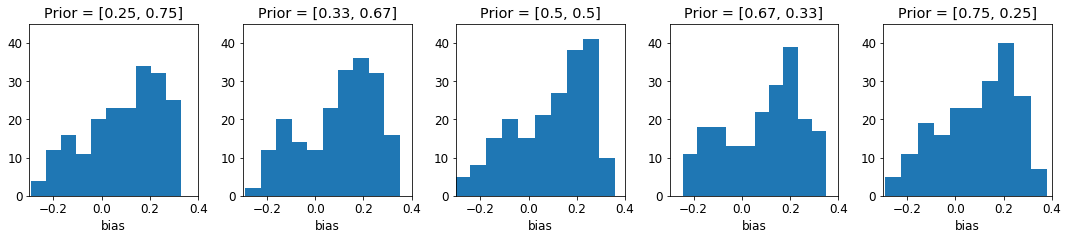

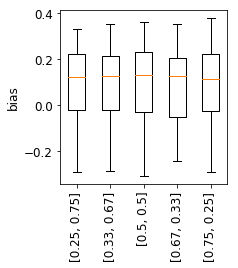

In [85]:
import seaborn as sns

plt.figure(figsize = (15,3.5))

for task_id in xrange(5):
    plt.subplot(1,5,task_id+1)
    # plt.boxplot(b2.T)
    plt.hist(b2[task_id,:].T)
    plt.xlim([-0.3,0.4])
    plt.ylim([0,45])
    plt.title('Prior = '+str(priors[task_id]))
    plt.xlabel('bias')
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/bias_hist.png',format='eps')

plt.tight_layout()

plt.figure(figsize = (3,3.2))
plt.boxplot(b2.T,labels=priors);
plt.xticks(rotation=90)
plt.ylabel('bias')
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/bias_boxplot.png',format='eps')


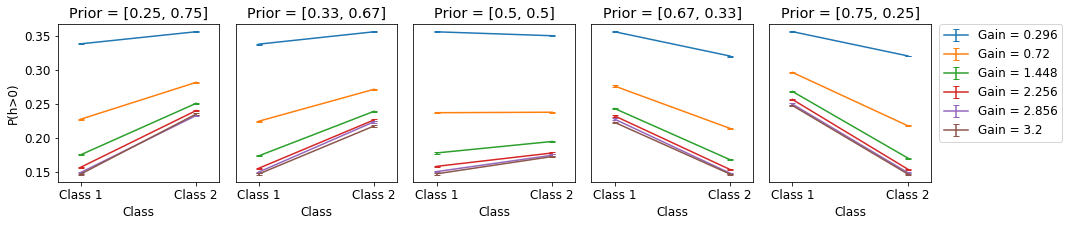

In [7]:
plt.figure(figsize=(15,3.3))
for task_id in xrange(0,5):
    plt.subplot(151+task_id)
    for ii in xrange(len(gain)):
        mean1=np.nanmean(Qs[task_id]['sp_all'][ii,:N_test])
        mean2=np.nanmean(Qs[task_id]['sp_all'][ii,N_test:])

        std1=np.nanstd(Qs[task_id]['sp_all'][ii,:N_test])/np.sqrt(N_test)
        std2=np.nanstd(Qs[task_id]['sp_all'][ii,N_test:])/np.sqrt(N_test)
        plt.errorbar([1,2],[mean1,mean2],[std1,std2],label=('Gain = '+str(gain[ii])),capsize=3)
#         plt.ylim([0.05,0.26])
        plt.xticks([1,2],['Class 1','Class 2'])
        plt.xlabel('Class')
        plt.xlim([0.8,2.2])
        plt.title('Prior = '+str(priors[task_id]))

        if task_id == 0:
            plt.ylabel('P(h>0)')
        else:
            plt.yticks([])
        if task_id == 4:
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

(5, 6)
(5, 6)
(6, 10)


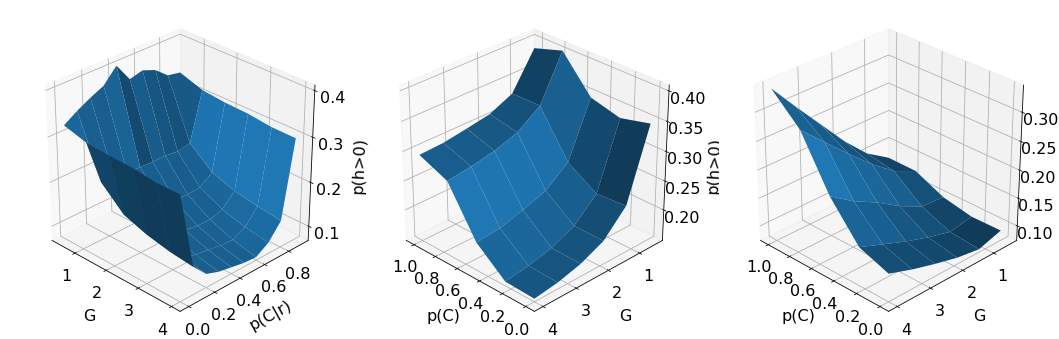

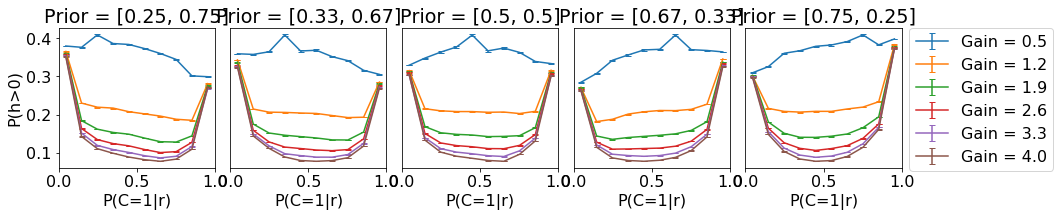

In [12]:
from mpl_toolkits.mplot3d import Axes3D

mean1 = np.zeros((5,6))
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(132,projection='3d')
for task_id in xrange(0,5):
    mean1[task_id,:]=np.nanmean(Qs[task_id]['sp_all'][:,:N_test],axis=1)
#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = np.arange(0, 1.25,0.25)
Y = gain
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(mean1.shape)
ax.plot_surface(X,Y,mean1.T)
ax.set_xlabel('p(C)')
ax.set_ylabel('G')
ax.set_zlabel('p(h>0)')
ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10

ax.view_init(30, 135)
# plt.tight_layout()
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/sparse_prior_vs_gain.eps',format='eps')


mean1 = np.zeros((5,6))

ax = fig.add_subplot(133,projection='3d')
for task_id in xrange(0,5):
    mean1[task_id,:]=np.nanmean(Qs[task_id]['H_mean_all'][:,:N_test],axis=1)
#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = np.arange(0, 1.25,0.25)
Y = gain
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(mean1.shape)
ax.plot_surface(X,Y,mean1.T)
ax.set_xlabel('p(C)')
ax.set_ylabel('G')
ax.set_zlabel(r'$\langle r \rangle$')
ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10

ax.view_init(30, 135)
plt.tight_layout()
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/sparse_r_prior_vs_gain.eps',format='eps')


mean2 = np.zeros((6,10))

ax = fig.add_subplot(131,projection='3d')

for ii in xrange(len(gain)):
    H = bin_plot(Qs[2]['Pg'][ii], Qs[2]['sp_all'][ii], sem=True, n_bins=11)
    mean2[ii,:]=H['post_mean']
#     mean2=np.nanmean(Qs[task_id]['sp_all'][:,N_test:])
X = gain
Y = np.arange(0, 1,0.1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(mean2.shape)
ax.plot_surface(X,Y,mean2.T)
ax.set_xlabel('G')
ax.set_ylabel('p(C|r)')
ax.set_zlabel('p(h>0)')
ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10

ax.view_init(30, 315)
plt.tight_layout()
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/3D_prior_vs_gain2.eps',format='eps')

plt.figure(figsize=(15,3.3))
for task_id in xrange(0,5):
    plt.subplot(151+task_id)
    for ii in xrange(len(gain)):
        H = bin_plot(Qs[task_id]['Pg'][ii], Qs[task_id]['sp_all'][ii], sem=True, n_bins=11)

        plt.errorbar(H['bins'],H['post_mean'],H['post_std'], label=('Gain = '+str(gain[ii])),capsize=3)
#         plt.ylim([0.0,0.3])
        if task_id == 0:
            plt.ylabel('P(h>0)')
        else:
            plt.yticks([])
    plt.xlabel('P(C=1|r)')
    plt.title('Prior = '+str(priors[task_id]))
    
    if task_id == 4:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

In [92]:
TC_width = np.zeros((5,200))
for task_id in xrange(5):
    test = tests[task_id]
    
    W = predictors[task_id].l1.weight.data.numpy()
    W2 = predictors[task_id].l2.weight.data.numpy()
    b = predictors[task_id].l1.bias.data.numpy()
    b2[task_id,:] = predictors[task_id].l1.bias.data.numpy()

    s = predictors[task_id].p1.data.numpy()
    s2[task_id,:] = predictors[task_id].p1.data.numpy()
    #b2 = model.predictor.l2.b.data

    idx = np.where(W2[0,:]>W2[1,:]+0.1)
    idx2 = np.where(W2[0,:]<W2[1,:]-0.1)
    
    TC = tuning_curves(test.H,test.S,test.G,gain,nbin=40,bin_lims = [-20,20])
    TC_width[task_id-1,:] = FWHM(TC[:,:,5],bin_lims = [-40,40],nbin=100)
    print(np.mean(TC_width[task_id-1,idx]),np.mean(TC_width[task_id-1,idx2]))

#     plt.tight_layout()
#     plt.subplots_adjust(wspace=0.1)


(8.78522837706511, 7.821892393320967)
(10.820328131252502, 8.79972327914217)
(10.566037735849056, 9.875950380152064)
(8.571428571428571, 9.95918367346939)
(8.430426716141001, 12.734693877551024)


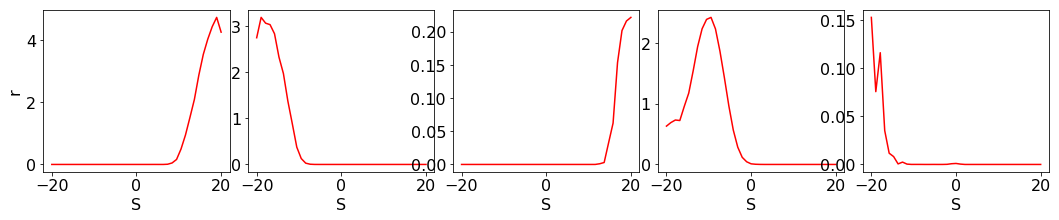

In [60]:
plt.figure(figsize=(15,15));plt.clf;

for task_id in xrange(1):
    test = tests[task_id]
    TC = tuning_curves(test.H,test.S,test.G,gain,nbin=40,bin_lims = [-20,20])
    for ii in xrange(5):
        plt.subplot(5,5,task_id*5+ii+1)
#         plt.plot(np.linspace(-20,20,39),TC[ii,:,].T,'k')
        plt.plot(np.linspace(-20,20,39),TC[ii, :, 5].T,'r')
        plt.xlabel('S')
        plt.tight_layout()
        plt.subplots_adjust(wspace=0.1)
        if  ii == 0:
            plt.ylabel('r')
#         else:
#             plt.yticks([])
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1)

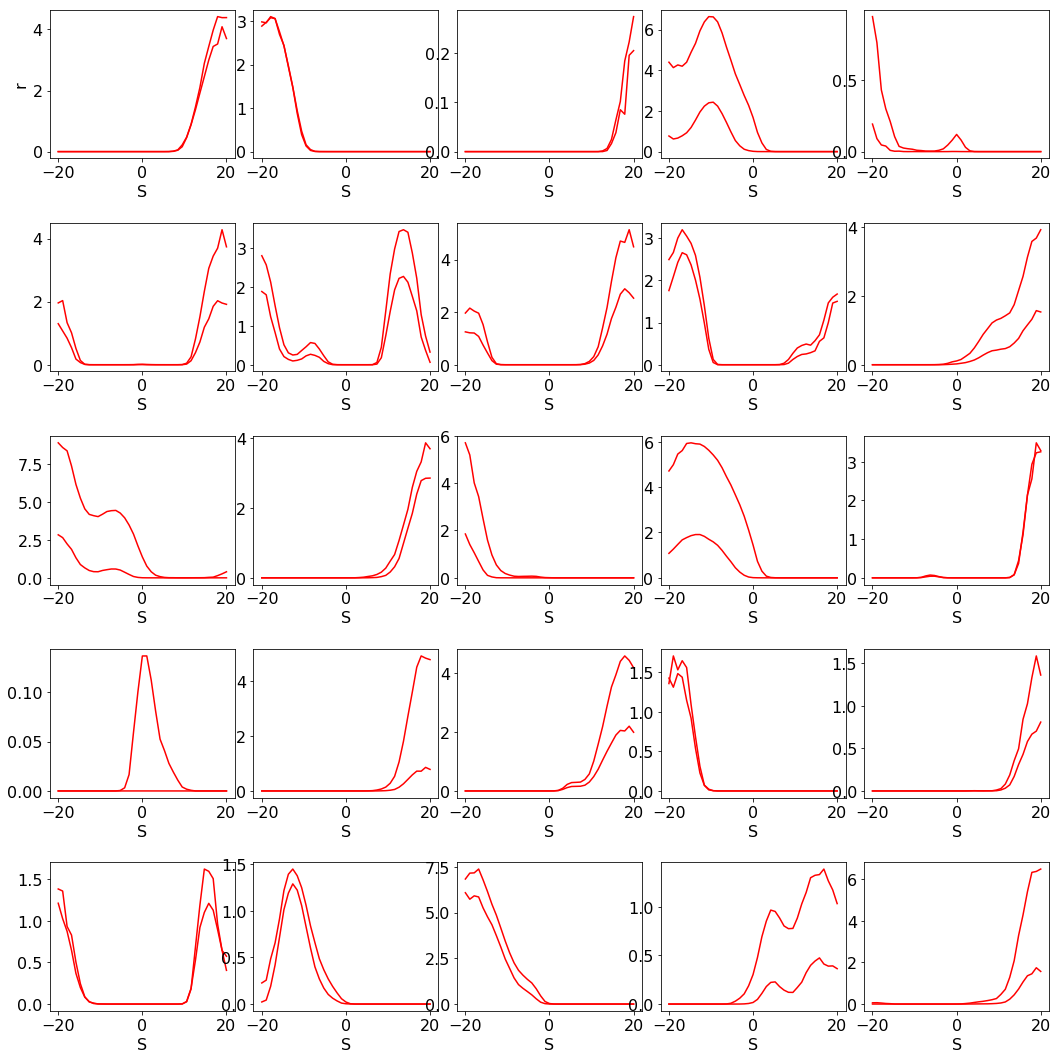

In [66]:
plt.figure(figsize=(15,15));plt.clf;

for task_id in xrange(2):
    test = tests[task_id]
    TC = tuning_curves(test.H,test.S,test.G,gain,nbin=40,bin_lims = [-20,20])
    for ii in xrange(25):
        plt.subplot(5,5,ii+1)
#         plt.plot(np.linspace(-20,20,39),TC[ii,:,].T,'k')
        plt.plot(np.linspace(-20,20,39),TC[ii, :, 5].T,'r')
        plt.xlabel('S')
        plt.tight_layout()
        plt.subplots_adjust(wspace=0.1)
        if  ii == 0:
            plt.ylabel('r')
#         else:
#             plt.yticks([])
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1)

In [116]:
import sys
sys.path.append("/home/squax/GitHub/PNN/")
import torch
import numpy as np
import tqdm
import json

import matplotlib.pyplot as plt
import scipy.stats as sst

from tasks import *
from pytorch_networks import *
from tools import *
from pytorch_trainer import *

task_id = 1

task = 'class_'+str(task_id)

param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/paramGH200_' + task + ''#2
model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/modelGH200_' + task + ''#2

with open(param_loc+'.json','r') as fp:
    params = json.load(fp)   
locals().update(params)
    
N_test = 20000

priors.append(prior)
# define task
test_data = classification_task(mu=means,sig2=sigmas,n_samples=N_test, sig2N = sig_phi,g=gain, n_input=N_input, pCin=prior,test=True,original=False)

# define iterator
test_iter = FixedIterator(test_data, batch_size=N_test*len(gain)*N_class*N_cond)

abl_acc = np.zeros((201))
idx_all = range(-1,200)

for abl_idx in idx_all:


    # define model
    model = Classifier(MLP(N_input,N_hidden, 2,idx = abl_idx, bias = False))

    # setup optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)


    # load model
    model.load_state_dict(torch.load(model_loc))
    model.eval()
    
    #model.predictor.l2.b.data[[0,1]]=model.predictor.l2.b.data[[1,0]]
#     model = Classifier(model)
    # setup tester
    test = tester(model)

    # run tester
    test.run(test_iter)
    Ctest=np.argmax(test.y.data.numpy(),axis=1)

    abl_acc[abl_idx+1]=1.0*np.sum(Ctest==test.C)/len(test.C)
    print(abl_acc[abl_idx+1])
np.set_printoptions(suppress=True)
abl_eff = abl_acc-abl_acc[0]
print(abl_eff.shape)
print(np.argsort(abl_eff))

0.793725
0.793425
0.7921833333333334
0.7919875
0.7934541666666667
0.7928041666666666
0.7937125
0.7927666666666666
0.793825
0.793425
0.7853416666666667
0.793425
0.793425
0.79375
0.7951583333333333
0.7934708333333333
0.7950083333333333
0.7934291666666666
0.792425
0.7938791666666667
0.7934208333333334
0.7935041666666667
0.7927166666666666
0.7936416666666667
0.7938041666666666
0.7934833333333333
0.7950125
0.7947541666666667
0.7948291666666667
0.793875
0.7933875
0.7926166666666666
0.7910208333333333
0.7944625
0.7939208333333333
0.7938666666666667
0.7936166666666666
0.7926375
0.7951458333333333
0.793425
0.7923916666666667
0.7935208333333333
0.7922583333333333
0.7924541666666667
0.7951666666666667
0.7932416666666666
0.7899125
0.7935791666666666
0.7943791666666666
0.793275
0.7932958333333333
0.7943541666666667
0.794525
0.7933958333333333
0.7905416666666667
0.7936666666666666
0.7935458333333333
0.7935083333333334
0.7936
0.7927916666666667
0.7934625
0.7948666666666667
0.7919333333333334
0.793562

[ 0.         -0.0003     -0.00154167 -0.0017375  -0.00027083 -0.00092083
 -0.0000125  -0.00095833  0.0001     -0.0003     -0.00838333 -0.0003
 -0.0003      0.000025    0.00143333 -0.00025417  0.00128333 -0.00029583
 -0.0013      0.00015417 -0.00030417 -0.00022083 -0.00100833 -0.00008333
  0.00007917 -0.00024167  0.0012875   0.00102917  0.00110417  0.00015
 -0.0003375  -0.00110833 -0.00270417  0.0007375   0.00019583  0.00014167
 -0.00010833 -0.0010875   0.00142083 -0.0003     -0.00133333 -0.00020417
 -0.00146667 -0.00127083  0.00144167 -0.00048333 -0.0038125  -0.00014583
  0.00065417 -0.00045    -0.00042917  0.00062917  0.0008     -0.00032917
 -0.00318333 -0.00005833 -0.00017917 -0.00021667 -0.000125   -0.00093333
 -0.0002625   0.00114167 -0.00179167 -0.0001625  -0.0003625  -0.00015
  0.0002625  -0.00163333 -0.00098333 -0.0017125   0.0011875  -0.00025417
 -0.00070417  0.000875    0.00104167 -0.00037917 -0.00875833 -0.000625
 -0.00022917  0.00174583  0.00094167 -0.00090833 -0.00030417  0

Text(0,0.5,'Ablation impact')

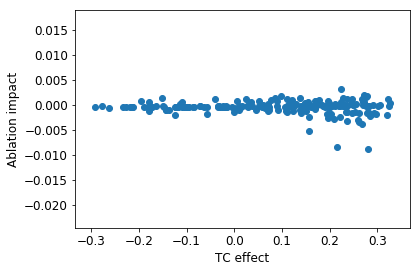

In [118]:
b = model.predictor.l1.bias.data.numpy()
print(abl_eff)
print(abl_eff.shape)
plt.figure()
plt.scatter(b[:],abl_eff[1:])
# plt.ylim([-0.002,0.002])
plt.xlabel('TC effect')
plt.ylabel('Ablation impact')

(240000, 1)
0.296
[array([False, False, False, ..., False, False, False])]
explained variance ratio (first two components): [0.17782283 0.13357715]


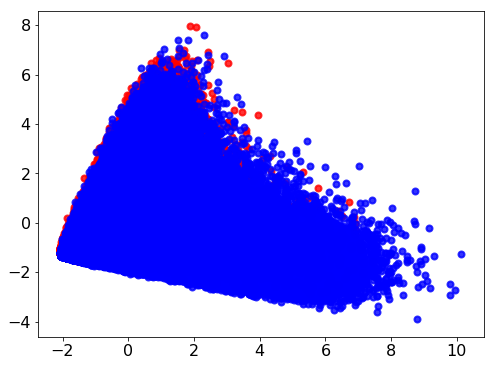

In [155]:
### PCA ###

from sklearn.decomposition import PCA
from sklearn import manifold

pca = PCA(n_components=2)
# idx = (tests[0].G==gain[0])
print(idx.shape)
X = tests[2].H[:,:]
C = tests[2].C[:]
# mds = manifold.MDS(2, max_iter=100, n_init=1)
# H_mds = mds.fit_transform(X)
H_pca = pca.fit(X).transform(X)
colors =['red','blue']
labels = ['Class 1', 'Class 2']
lw = 2
print(gain[0])
print([(tests[2].C==ii) & (tests[2].G[:,0]==gain[0])])
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure(1, figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)

for color, ii, label in zip(colors,[0,1],labels):
    plt.scatter(H_pca[C==ii, 0], H_pca[C==ii, 1], color=color, alpha=.8, lw=lw,
                label=label)

# fig = plt.figure(2, figsize=(8, 6))
# # ax = Axes3D(fig, elev=-150, azim=110)

# for color, ii, label in zip(colors,[0,1],labels):
#     plt.scatter(H_mds[C==ii, 0], H_mds[C==ii, 1], color=color, alpha=.8, lw=lw,
#                 label=label)

[3.13015496 1.45221563]
(49, 2)
[995.20162351 753.61652628 600.92031795 537.1129985  562.19456794
 676.16502627 879.02437349 731.24400188 489.65890465 336.96269631
 273.15537687 298.23694631 412.20740464 615.06675186 556.17526913
 314.59017191 161.89396357  98.08664412 123.16821356 237.13867189
 439.99801911 469.99542528 228.41032805  75.71411972  11.90680027
  36.98836971 150.95882804 353.81817526 472.70447031 231.11937309
  78.42316475  14.6158453   39.69741475 153.66787308 356.52722029
 564.30240424 322.71730701 170.02109868 106.21377923 131.29534867
 245.265807   448.12515422 744.78922705 503.20412982 350.50792149
 286.70060204 311.78217148 425.75262981 628.61197703]


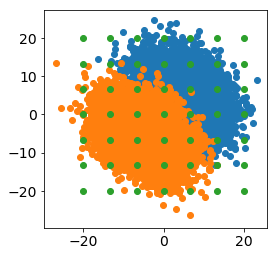

In [58]:
A = np.random.multivariate_normal([5,5],[[25,-9],[-9,25]],size=10000)
B = np.random.multivariate_normal([-5,-5],[[25,-9],[-9,25]],size=10000)
C0 = np.random.multivariate_normal([1, 1], [[1, -0.5], [-0.5, 1]], size=300)
C1 = np.random.multivariate_normal([1, 1], [[1, -0.5], [-0.5, 1]], size=(500))
X = np.concatenate((C0,C1))

print(X[0,:])
plt.figure(figsize=[4,4])
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1])

phi = np.mgrid[-20:20:7j, -20:20:7j].reshape(2,-1).T
print(xy.shape)
plt.scatter(xy[:,0],xy[:,1])

out = np.matmul(X,phi.T)
phi.shape

XT = np.tile(np.expand_dims(X,2), (1, 1, 49))
lamb = (XT - np.tile(np.expand_dims(phi.T,0), (800, 1,1)))**2
lout = np.sum(lamb,1)
print(lout[0,:])